In [1]:
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

import pickle

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
df['view'].head()

0    NONE
1    NONE
2    NONE
3    NONE
4    NONE
Name: view, dtype: object

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df['waterfront'].unique()
df['waterfront'].value_counts(dropna=False)
# Turn NaNs to No
df['waterfront'] = df['waterfront'].fillna('NO')

# Convert to 0 or 1
mapdict = {'YES': 1, 'NO': 0}
df['waterfront'] = df['waterfront'].map(mapdict)

# Check result
df['waterfront'].value_counts(dropna=False)

0    21451
1      146
Name: waterfront, dtype: int64

In [7]:
df['waterfront']

0        0
1        0
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: waterfront, Length: 21597, dtype: int64

In [8]:
# Create Yes/No column for view
df['view_y_n'] = df['view'].apply(lambda x: 0 if x == 'NONE' else 1)
df['view_y_n'].value_counts()

# Actually let's just drop view because so many are None.
df.drop(['view_y_n', 'view'], axis = 1, inplace=True)

df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
df['condition'].value_counts()

# Map numerical values

mapdict = {'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}
df['condition'] = df['condition'].map(mapdict)


df['condition'].value_counts()

2    14020
3     5677
4     1701
1      170
0       29
Name: condition, dtype: int64

## Need to change below value to int or float to be able to use this in the model

In [10]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [11]:
df['grade'].describe()

count         21597
unique           11
top       7 Average
freq           8974
Name: grade, dtype: object

In [12]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,-0.023803,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.036056,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.026496,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.126479,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.059445,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.008830,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.264075,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.016648,0.071778,-0.024487,0.081397,0.028923,-0.012157,-0.037628,0.083823,0.030658
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,1.000000,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,0.071778,-0.158904,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077


<AxesSubplot:>

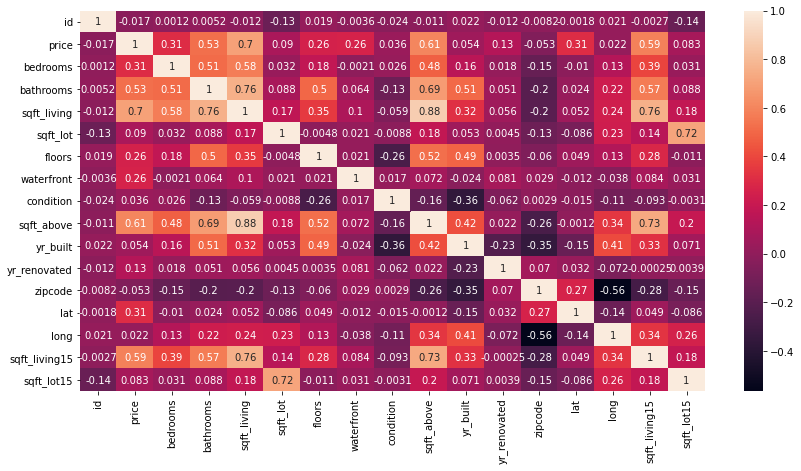

In [13]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True)


In [14]:
df_augmented = sm.add_constant(df)

## Removing 'price' column so that we can compare against this later in the model, removing the remainder of the columns as lat and long are not relevant to the study as well the square foot columns are too correlated with other squarefoot columns

In [15]:
x = df_augmented.drop(columns=['lat','long','sqft_living15','sqft_lot15'])

In [16]:
x.dropna()

,const,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,1.0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,2,7 Average,1180,0.0,1955,0.0,98178
1,1.0,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,2,7 Average,2170,400.0,1951,1991.0,98125
3,1.0,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,4,7 Average,1050,910.0,1965,0.0,98136
4,1.0,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,2,8 Good,1680,0.0,1987,0.0,98074
5,1.0,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0,2,11 Excellent,3890,1530.0,2001,0.0,98053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1.0,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,2,8 Good,1530,0.0,2009,0.0,98103
21593,1.0,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,2,8 Good,2310,0.0,2014,0.0,98146
21594,1.0,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,2,7 Average,1020,0.0,2009,0.0,98144
21595,1.0,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,2,8 Good,1600,0.0,2004,0.0,98027


## Need all below to be equal to int or float, still have some as 'object'
 - date 
 - condition
 - grade 
 - sqft_basement

In [17]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          21597 non-null  float64
 1   id             21597 non-null  int64  
 2   date           21597 non-null  object 
 3   price          21597 non-null  float64
 4   bedrooms       21597 non-null  int64  
 5   bathrooms      21597 non-null  float64
 6   sqft_living    21597 non-null  int64  
 7   sqft_lot       21597 non-null  int64  
 8   floors         21597 non-null  float64
 9   waterfront     21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
dtypes: float64(5), int64(9), object(3)
memory usage: 2

In [18]:
x.drop(x.loc[x['sqft_basement'] == '?'].index, inplace=True)
x['sqft_basement'] = x['sqft_basement'].astype(float)

In [19]:
x['date'] = pd.to_datetime(x['date'])

In [20]:
apdict = {'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}
x['condition'] = x['condition'].map(mapdict)


x['condition'].value_counts()

Series([], Name: condition, dtype: int64)

In [21]:
x.head()

,const,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,1.0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,NaN,7 Average,1180,0.0,1955,0.0,98178
1,1.0,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,NaN,7 Average,2170,400.0,1951,1991.0,98125
2,1.0,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,NaN,6 Low Average,770,0.0,1933,NaN,98028
3,1.0,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,NaN,7 Average,1050,910.0,1965,0.0,98136
4,1.0,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,NaN,8 Good,1680,0.0,1987,0.0,98074


## Setting up correlation again to take a look at the final columns we will use

<AxesSubplot:>

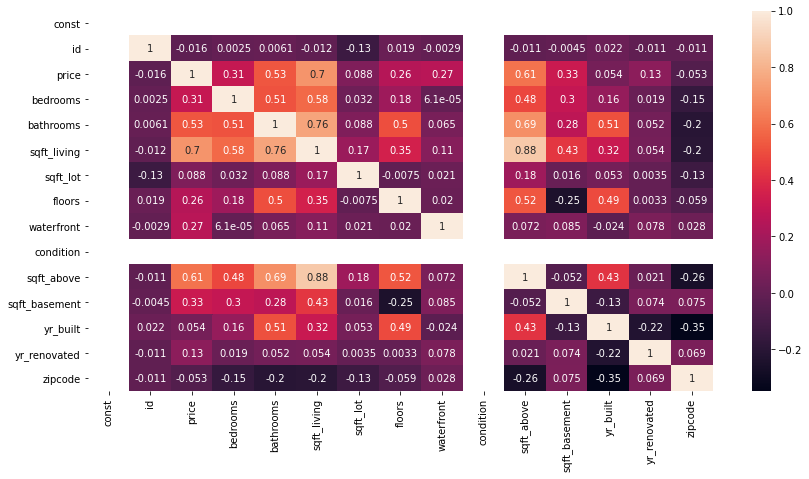

In [22]:
plt.figure(figsize=(14,7))
sns.heatmap(x.corr(),annot=True)

In [23]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   const          21143 non-null  float64       
 1   id             21143 non-null  int64         
 2   date           21143 non-null  datetime64[ns]
 3   price          21143 non-null  float64       
 4   bedrooms       21143 non-null  int64         
 5   bathrooms      21143 non-null  float64       
 6   sqft_living    21143 non-null  int64         
 7   sqft_lot       21143 non-null  int64         
 8   floors         21143 non-null  float64       
 9   waterfront     21143 non-null  int64         
 10  condition      0 non-null      float64       
 11  grade          21143 non-null  object        
 12  sqft_above     21143 non-null  int64         
 13  sqft_basement  21143 non-null  float64       
 14  yr_built       21143 non-null  int64         
 15  yr_renovated   1738

## Temporarily removing grade to see if we can run this

In [24]:
x_temp = x.drop(columns = ['grade','date','condition'])

In [25]:
x_temp.dropna()

,const,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,1.0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,1180,0.0,1955,0.0,98178
1,1.0,6414100192,538000.0,3,2.25,2570,7242,2.0,0,2170,400.0,1951,1991.0,98125
3,1.0,2487200875,604000.0,4,3.00,1960,5000,1.0,0,1050,910.0,1965,0.0,98136
4,1.0,1954400510,510000.0,3,2.00,1680,8080,1.0,0,1680,0.0,1987,0.0,98074
5,1.0,7237550310,1230000.0,4,4.50,5420,101930,1.0,0,3890,1530.0,2001,0.0,98053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1.0,263000018,360000.0,3,2.50,1530,1131,3.0,0,1530,0.0,2009,0.0,98103
21593,1.0,6600060120,400000.0,4,2.50,2310,5813,2.0,0,2310,0.0,2014,0.0,98146
21594,1.0,1523300141,402101.0,2,0.75,1020,1350,2.0,0,1020,0.0,2009,0.0,98144
21595,1.0,291310100,400000.0,3,2.50,1600,2388,2.0,0,1600,0.0,2004,0.0,98027


In [26]:
x_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          21143 non-null  float64
 1   id             21143 non-null  int64  
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  int64  
 9   sqft_above     21143 non-null  int64  
 10  sqft_basement  21143 non-null  float64
 11  yr_built       21143 non-null  int64  
 12  yr_renovated   17389 non-null  float64
 13  zipcode        21143 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 2.4 MB


In [27]:
x_temp

,const,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,1.0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,1180,0.0,1955,0.0,98178
1,1.0,6414100192,538000.0,3,2.25,2570,7242,2.0,0,2170,400.0,1951,1991.0,98125
2,1.0,5631500400,180000.0,2,1.00,770,10000,1.0,0,770,0.0,1933,NaN,98028
3,1.0,2487200875,604000.0,4,3.00,1960,5000,1.0,0,1050,910.0,1965,0.0,98136
4,1.0,1954400510,510000.0,3,2.00,1680,8080,1.0,0,1680,0.0,1987,0.0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1.0,263000018,360000.0,3,2.50,1530,1131,3.0,0,1530,0.0,2009,0.0,98103
21593,1.0,6600060120,400000.0,4,2.50,2310,5813,2.0,0,2310,0.0,2014,0.0,98146
21594,1.0,1523300141,402101.0,2,0.75,1020,1350,2.0,0,1020,0.0,2009,0.0,98144
21595,1.0,291310100,400000.0,3,2.50,1600,2388,2.0,0,1600,0.0,2004,0.0,98027


In [28]:
x_temp = x_temp.fillna(method='ffill')

In [29]:
y = x_temp['price']

In [30]:
len(y)

21143

In [31]:
len(x_temp)

21143

In [32]:
x_temp = x_temp.drop(columns = ['price'])

In [33]:
x_temp['yr_renovated'].dropna()

0           0.0
1        1991.0
2        1991.0
3           0.0
4           0.0
          ...  
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: yr_renovated, Length: 21143, dtype: float64

In [34]:
x_temp

,const,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,1.0,7129300520,3,1.00,1180,5650,1.0,0,1180,0.0,1955,0.0,98178
1,1.0,6414100192,3,2.25,2570,7242,2.0,0,2170,400.0,1951,1991.0,98125
2,1.0,5631500400,2,1.00,770,10000,1.0,0,770,0.0,1933,1991.0,98028
3,1.0,2487200875,4,3.00,1960,5000,1.0,0,1050,910.0,1965,0.0,98136
4,1.0,1954400510,3,2.00,1680,8080,1.0,0,1680,0.0,1987,0.0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1.0,263000018,3,2.50,1530,1131,3.0,0,1530,0.0,2009,0.0,98103
21593,1.0,6600060120,4,2.50,2310,5813,2.0,0,2310,0.0,2014,0.0,98146
21594,1.0,1523300141,2,0.75,1020,1350,2.0,0,1020,0.0,2009,0.0,98144
21595,1.0,291310100,3,2.50,1600,2388,2.0,0,1600,0.0,2004,0.0,98027


In [35]:
results = sm.OLS(y,x_temp).fit()

In [36]:
results.params

const            1.861026e+06
id              -9.689523e-07
bedrooms        -6.172314e+04
bathrooms        6.748610e+04
sqft_living      1.918805e+02
sqft_lot        -3.351408e-01
floors           4.449573e+04
waterfront       7.774226e+05
sqft_above       1.059362e+02
sqft_basement    8.594432e+01
yr_built        -3.201214e+03
yr_renovated     9.135992e+00
zipcode          4.463462e+01
dtype: float64

In [37]:
x_standard = x_temp.apply(lambda x: (x - x.mean())/x.std())

In [38]:
x_standard

,const,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,NaN,0.885955,-0.402802,-1.452224,-0.980810,-0.229006,-0.915330,-0.082227,-0.735227,-0.659554,-0.546459,-0.208385,1.870359
1,NaN,0.637304,-0.402802,0.174256,0.532448,-0.190373,0.939099,-0.082227,0.459834,0.244404,-0.682875,4.785665,0.880367
2,NaN,0.365221,-1.483981,-1.452224,-1.427167,-0.123447,-0.915330,-0.082227,-1.230151,-0.659554,-1.296750,4.785665,-0.931506
3,NaN,-0.727943,0.678377,1.150144,-0.131643,-0.244779,-0.915330,-0.082227,-0.892154,1.396951,-0.205417,-0.208385,1.085837
4,NaN,-0.913179,-0.402802,-0.151040,-0.436472,-0.170038,-0.915330,-0.082227,-0.131661,-0.659554,0.544875,-0.208385,-0.072267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,NaN,-1.501221,-0.402802,0.499552,-0.599774,-0.338666,2.793529,-0.082227,-0.312731,-0.659554,1.295166,-0.208385,0.469427
21593,NaN,0.701956,0.678377,0.499552,0.249393,-0.225050,0.939099,-0.082227,0.628833,-0.659554,1.465687,-0.208385,1.272628
21594,NaN,-1.063058,-1.483981,-1.777520,-1.154998,-0.333351,0.939099,-0.082227,-0.928368,-0.659554,1.295166,-0.208385,1.235270
21595,NaN,-1.491379,-0.402802,0.499552,-0.523566,-0.308163,0.939099,-0.082227,-0.228231,-0.659554,1.124645,-0.208385,-0.950185


In [39]:
y_standard = (y - y.mean())/y.std()

In [40]:
x_standard = x_standard.drop(columns = ['const','id','floors','sqft_above','sqft_basement'])

In [41]:
x_standard_aug = sm.add_constant(x_standard)

In [42]:
results_stand = sm.OLS(y_standard,x_standard_aug).fit()

In [43]:
weights = results_stand.params
weights

const           5.789640e-17
bedrooms       -1.604249e-01
bathrooms       1.614144e-01
sqft_living     7.350510e-01
sqft_lot       -3.837555e-02
waterfront      1.716498e-01
yr_built       -2.240607e-01
yr_renovated    1.347407e-02
zipcode         1.313122e-02
dtype: float64

<AxesSubplot:>

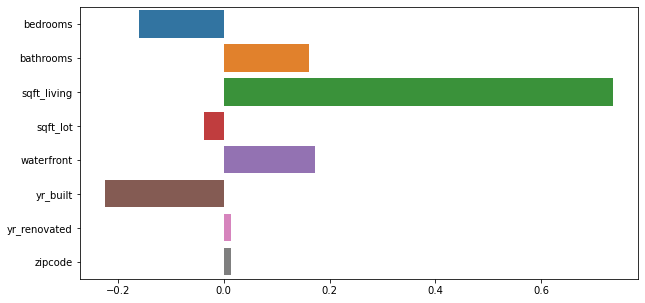

In [44]:
plt.figure(figsize=(10,5))
sns.barplot( y = weights[1::].index, x = weights[1::].values)

### Here is an early model of how we cn look at the correlations between various aspects of the house and the price that the house sold for. As we can see the squarefootage of both the living area of the house and the general squarefootage of the house are highly related to the price. This makes sense as this tells us that the more space is in the house the more expensive the house is. As well we can see lesser correlations with cosmetic or aesthetic choises such as waterfront. One currious finding here is that the number of bedrooms seems to have very little effect on the final price of the house, this could mean that people are looking more for living space than a large amount of bedrooms or perhaps there are a lot of people buying in this county who do not have children or have small families. As well we can see that the year that the house was built has the least effect on the sale price. 


In [46]:
results_stand.rsquared

0.5824232796482238

### very low r^2 value here, not great. Could look at ways to make this higher by removing more columns that are not necessary

In [48]:
results_stand.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     3685.
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:20:07   Log-Likelihood:                -20768.
No. Observations:               21143   AIC:                         4.155e+04
Df Residuals:                   21134   BIC:                         4.163e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          5.79e-17      0.004    1.3e-14      1.000      -0.009       0.009
bedrooms        -0.1604      0.006    -28.688      0.000      -0.171      -0.149
bathrooms        0.1614      0.008     20.918      0.000       0.146       0.177
sqft_living      0.7351      0.007     99.385      0.000       0.721       0.750
sqft_lot        -0.0384      0.005     -8.410      0.000      -0.047      -0.029
waterfront       0.1716      0.005     38.124      0.000       0.163       0.180
yr_built        -0.2241      0.006    -39.645      0.000      -0.235      -0.213
yr_renovated     0.0135      0.005      2.930      0.003       0.004       0.022
zipcode          0.0131      0.005      2.729      0.006       0.004       0.023
==============================================================================
Omnibus:                    12313.984   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           374071.582
Skew:                           2.265   Prob(JB):                         0.00
Kurtosis:                      23.102   Cond. No.                         3.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
y_axis = y
x_axis = x_temp['sqft_living']
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21143, dtype: float64

In [53]:
x_axis

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Name: sqft_living, Length: 21143, dtype: int64

/Users/matthewgittings/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

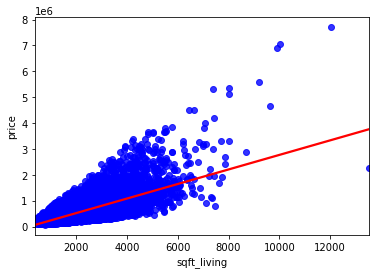

In [69]:
sns.regplot(x_axis, y_axis, ci=None,scatter_kws={"color": "blue"}, line_kws={"color": "red"})